## Milestone 2 - All Cities EDA

The purpose of this EDA is to conduct an EDA analysis on all the US cities that are in consideration for the project:
* Broward County (FL)
* Jersey City (NJ)
* New York City (NY)
* Cambridge (MA)
* Washington DC
* Nashville (TN)
* Denver (CO)
* Ausin (TX)
* Chicago (IL)
* New Orleans (LA)
* Seattle (WA)
* Los Angeles (CA)
* San Francisco (CA)
* Portland (OR)
* Clark County (NV)

This is one of multiple milestone 2 EDA notebooks the team is conducting on our Airbnb project.

The dataset used for this EDA was compiled with our final cleaned dataset.

In [77]:
import pandas as pd
import spacy
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mannwhitneyu
from statistics import mean
from scipy.stats import norm
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib.colors import ListedColormap
from collections import Counter
import geopandas as gpd
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import math
import ast
import datetime

In [78]:
# Define the directory path for each city
clean_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\Milestone2\EDA-All-Cities'

# File name
clean = 'final-df.csv'
clean_path = clean_directory_path + '\\' + clean

In [79]:
clean_df = pd.read_csv(clean_path,  na_filter=False)

In [80]:
clean_df.head()

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,price,number_of_reviews,review_scores_value,calculated_host_listings_count,city,amenities_count,neighborhood_city,full_time_host,host_verifications_clean,essential_amenities
0,827736378366911479,475630606,Sean,2022-08-18,Unknown,within an hour,100%,94%,f,1.0,...,222.0,0,,1,Broward County,10,Fort Lauderdale Broward County,f,p,3
1,592589963829194972,66506549,Ryan,2016-04-09,Alpharetta GA,within an hour,98%,16%,f,1.0,...,500.0,0,,5,Broward County,29,Pompano Beach Broward County,f,ep,3
2,772438920837360569,382318476,Maggie,2020-12-30,Unknown,within an hour,100%,89%,t,1.0,...,500.0,2,5.0,1,Broward County,14,Southwest Ranches Broward County,f,ep,3
3,33271346,118856968,Steve And Jo,2017-03-02,Fort Lauderdale FL,within an hour,100%,100%,f,1.0,...,186.0,129,4.68,3,Broward County,22,Pompano Beach Broward County,f,pw,4
4,484515,637272,Bianca,2011-05-28,Buenos Aires Argentina,within an hour,95%,26%,f,1.0,...,297.0,27,4.44,6,Broward County,17,Hollywood Broward County,f,ep,3


In [81]:
# Check the file size
clean_df.shape

(185918, 31)

In [82]:
def convert_listings_detailed_data(df):
    # Convert date column to datetime and extract date part
    df['host_since'] = pd.to_datetime(df['host_since']).dt.date
    df['review_scores_value'] = pd.to_numeric(df['review_scores_value'], errors='coerce')
    
    return df

# Applying the conversion function to each dataframe
clean_df = convert_listings_detailed_data(clean_df)

In [83]:
def analyze_dataframe_listings_detailed(df, threshold=20):
    print("Analyzing DataFrame:")
    print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
    
    # Missing values
    missing_values_count = df.isnull().sum()
    total_missing = missing_values_count.sum()
    print(f"Total Missing Values: {total_missing}")
    if total_missing > 0:
        print("Missing Values by Column:")
        for column, missing_count in missing_values_count.items():
            if missing_count > 0:
                print(f" - {column}: {missing_count} missing values")
    
    # Handling columns by data type
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calculate statistics
            min_value = df[column].min()
            median_value = df[column].median()
            mean_value = df[column].mean()
            std_deviation = df[column].std()
            max_value = df[column].max()
            # Print statistics
            print(f"{column} (Numerical): Min = {min_value}, Median = {median_value}, Mean = {mean_value}, Std Dev = {std_deviation}, Max = {max_value}")
        elif pd.api.types.is_object_dtype(df[column]) and all(isinstance(x, (datetime.date, type(pd.NaT))) for x in df[column].dropna()):
            # Handle date columns
            non_na_values = df[column].dropna()
            if non_na_values.empty:
                min_date = max_date = "No Dates Available"
            else:
                min_date = non_na_values.min()
                max_date = non_na_values.max()
            print(f"{column} (Date): Range = {min_date} to {max_date}")
        else:
            # Handle categorical columns
            unique_values = df[column].unique()
            if len(unique_values) <= threshold:
                print(f"{column} (Categorical): Categories = {unique_values}")
            else:
                print(f"{column} (Categorical): {len(unique_values)} unique categories")
    print("------\n")

analyze_dataframe_listings_detailed(clean_df)


Analyzing DataFrame:
Total Rows: 185918, Total Columns: 31
Total Missing Values: 41923
Missing Values by Column:
 - review_scores_value: 41923 missing values
id (Numerical): Min = 109, Median = 49177296.5, Mean = 2.6234010387335638e+17, Std Dev = 3.478140627568042e+17, Max = 857939379979015878
host_id (Numerical): Min = 23, Median = 100967924.0, Mean = 159820348.34147313, Std Dev = 160431880.65117538, Max = 506938352
host_name (Categorical): 25142 unique categories
host_since (Date): Range = 2008-03-03 to 2023-03-28
host_location (Categorical): 2961 unique categories
host_response_time (Categorical): Categories = ['within an hour' 'within a few hours' 'within a day' 'a few days or more'
 '']
host_response_rate (Categorical): 81 unique categories
host_acceptance_rate (Categorical): 101 unique categories
host_is_superhost (Categorical): Categories = ['f' 't']
host_listings_count (Numerical): Min = 0.0, Median = 2.0, Mean = 139.14061037661764, Std Dev = 660.4075573583976, Max = 4818.0
hos

### EDA on Number of Listings with Zero Reviews by City

We see that Los Angeles and New York City had the most number of listings with 0 Reviews.

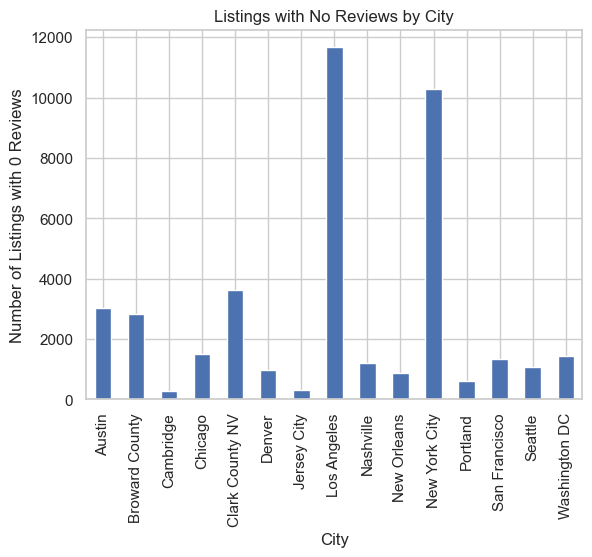

In [84]:
# Filter rows where number_of_reviews is 0
filtered_df = clean_df[clean_df['number_of_reviews'] == 0]

# Group by 'city' and count the number of occurrences
city_counts = filtered_df.groupby('city').size()

city_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Listings with 0 Reviews')
plt.title('Listings with No Reviews by City')
plt.xticks(rotation=90)
plt.show()

#### Examine if number of zero reviews equates to when review_scores_value is null

In [85]:
# Count the total number of listings with zero reviews: 40,989
filtered_df.shape

# Our dataset has 185,918 listings so 22.04% of listings have zero reviews

# 40989/185918

(40989, 31)

In [86]:
# See what is the number of review_scores_value being null
clean_df[clean_df['review_scores_value'].isnull()].shape

(41923, 31)

In [87]:
# See what is the number of reviews that are 0
clean_df[(clean_df['number_of_reviews'] == 0)].shape

(40989, 31)

In [88]:
# Our intuition was that most of number_of_reviews when 0 is why review_scores_value is null, but we see that
# there are 934 cases where review_scores_value is null but number_of_reviews > 0 
41923-40989

934

In [89]:
# Verified that number_of_reviews when 0 is when review_scores_value is null
filtered_df = clean_df[(clean_df['number_of_reviews'] == 0) & (clean_df['review_scores_value'].isnull())]
size_count = filtered_df.shape[0]
size_count

40989

We made a pie chart to see the percentage of cases this occurs and decided that since the percentage of where number_of_reviews > 0 with review_scores_value is null is only 0.5% that we decided we will drop these cases from our training and testing datasets

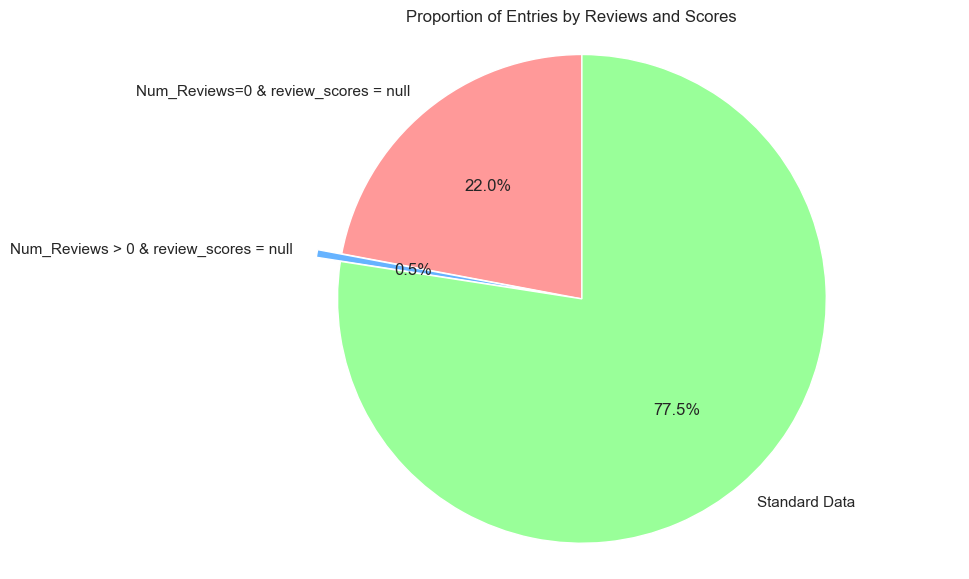

In [90]:
total_entries = clean_df.shape[0]
reviews_zero_scores_null = clean_df[(clean_df['number_of_reviews'] == 0) & (clean_df['review_scores_value'].isnull())].shape[0]
reviews_not_zero_scores_null = clean_df[(clean_df['number_of_reviews'] != 0) & (clean_df['review_scores_value'].isnull())].shape[0]
other_cases = total_entries - (reviews_zero_scores_null + reviews_not_zero_scores_null)

labels = ['Num_Reviews=0 & review_scores = null', 'Num_Reviews > 0 & review_scores = null', 'Standard Data']

sizes = [reviews_zero_scores_null, reviews_not_zero_scores_null, other_cases]

colors = ['#ff9999','#66b3ff','#99ff99']

# Exploding the 2nd slice: 'Num_Reviews > 0 & review_scores = null'
explode = (0, 0.1, 0)

plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio to draw the pie as a circle.
plt.axis('equal')  
plt.title('Proportion of Entries by Reviews and Scores')
plt.show()

In [91]:
# We took a deeper look into the data and saw that the reason number_of_reviews is 0 is because possibly
# people skipped answering the question on Airbnb and there are very few reviews
filtered_entries = clean_df[(clean_df['review_scores_value'].isnull()) & (clean_df['number_of_reviews'] != 0)]

filtered_entries

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,price,number_of_reviews,review_scores_value,calculated_host_listings_count,city,amenities_count,neighborhood_city,full_time_host,host_verifications_clean,essential_amenities
297,19438081,35784515,Elaine,2015-06-14,Fort Lauderdale FL,a few days or more,0%,,f,1.0,...,279.0,1,NaN,5,Broward County,21,Pompano Beach Broward County,f,ep,4
355,35617969,225892475,Enrique,2018-11-15,Unknown,,,,f,1.0,...,258.0,1,NaN,1,Broward County,15,Pompano Beach Broward County,f,ep,3
544,42607509,339409538,John,2020-02-28,Unknown,within a day,100%,14%,f,1.0,...,169.0,1,NaN,1,Broward County,12,Lauderdale By The Sea Broward County,f,ep,3
657,32207593,33295885,Yarden,2015-05-13,United States,within an hour,96%,98%,f,1.0,...,171.0,1,NaN,50,Broward County,21,Hallandale Beach Broward County,f,ep,3
719,41620518,328207714,Joel,2020-01-16,Unknown,,,,f,1.0,...,343.0,7,NaN,1,Broward County,19,Hollywood Broward County,f,ep,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179913,29739220,80061753,Eli,2016-06-26,Chicago IL,,,,f,1.0,...,149.0,1,NaN,1,Chicago,29,West Town Chicago,f,ep,5
180093,32501089,231516337,Nick,2018-12-19,unknown,,,,f,1.0,...,150.0,1,NaN,1,Chicago,19,Near North Side Chicago,f,ep,4
180509,37618731,198377798,Alan,2018-06-27,Chicago IL,,,,f,1.0,...,175.0,1,NaN,1,Chicago,18,Edgewater Chicago,f,ep,4
180605,38666661,271377854,Jennifer,2019-06-25,Chicago IL,,,,f,1.0,...,40.0,2,NaN,1,Chicago,10,Humboldt Park Chicago,f,ep,5


In [92]:
# max number of reviews given that review_scores_value is null is 22, which is very few reviews that given to a listing
# which will have review_scores_value be null
filtered_entries['number_of_reviews'].max() 

22

#### Examine Empty Host Response Time Categories

There is a category that is '' which is empty/missing

In [93]:
clean_df[(clean_df['host_response_time']== '')].shape

(37230, 31)

In [94]:
filtered_df = clean_df[(clean_df['number_of_reviews'] == 0) & (clean_df['host_response_time']== '')]
size_count = filtered_df.shape[0]
size_count

# This shows that there is not much connection with number_of_reviews being 0 and host_response_time being empty
# since there are 25,776 values unaccounted for (37,230-11,454)

11454

Pie chart below shows that 13.9% of data has host_response_time as empty but will have number of reviews > 0, so this shows there is no relationship with zero reviews and host_response_time so we cannot directly drop this listing information. Instead, we drop this column.

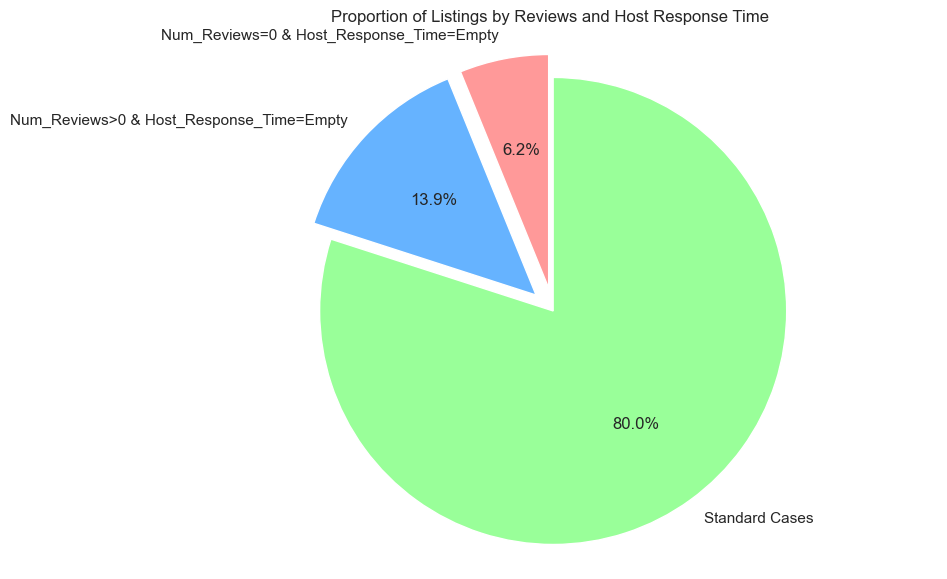

In [98]:
# Calculating conditons
reviews_zero_response_empty = clean_df[(clean_df['number_of_reviews'] == 0) & (clean_df['host_response_time'] == '')].shape[0]
reviews_positive_response_empty = clean_df[(clean_df['number_of_reviews'] > 0) & (clean_df['host_response_time'] == '')].shape[0]

# The rest of the cases
other_cases = clean_df.shape[0] - (reviews_zero_response_empty + reviews_positive_response_empty)

# Labels for the sections
labels = ['Num_Reviews=0 & Host_Response_Time=Empty', 'Num_Reviews>0 & Host_Response_Time=Empty', 'Standard Cases']

# Values for each section
sizes = [reviews_zero_response_empty, reviews_positive_response_empty, other_cases]

# Colors for each section
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Exploding the first two slices for emphasis
explode = (0.1, 0.1, 0)

plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Listings by Reviews and Host Response Time')
plt.show()

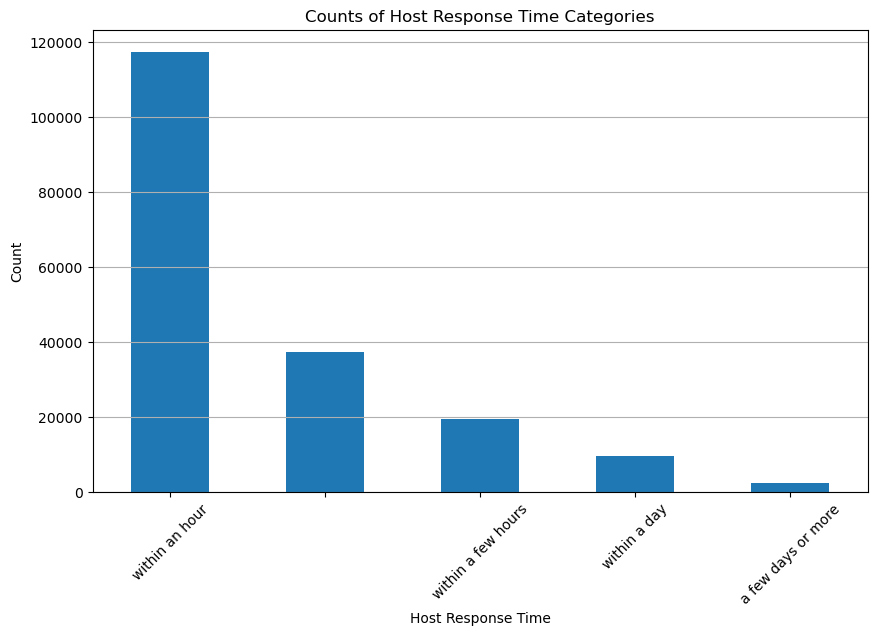

In [60]:
category_counts = clean_df['host_response_time'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Counts of Host Response Time Categories')
plt.xlabel('Host Response Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

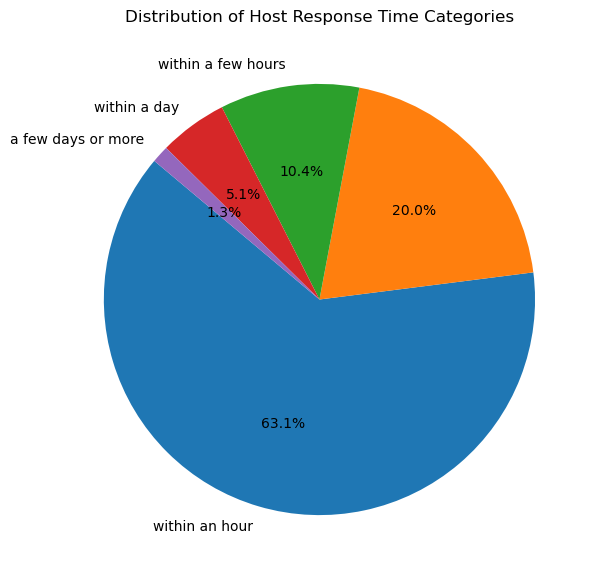

In [61]:
plt.figure(figsize=(10, 7))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')  
plt.title('Distribution of Host Response Time Categories')
plt.show()


# Note that '' is the graphic in orange. We can see that 20% of data has host response time as empty/missing
# So we decided to remove that column from our dataset instead of deleting rows.

### EDA on Essential Amenties for All Cities

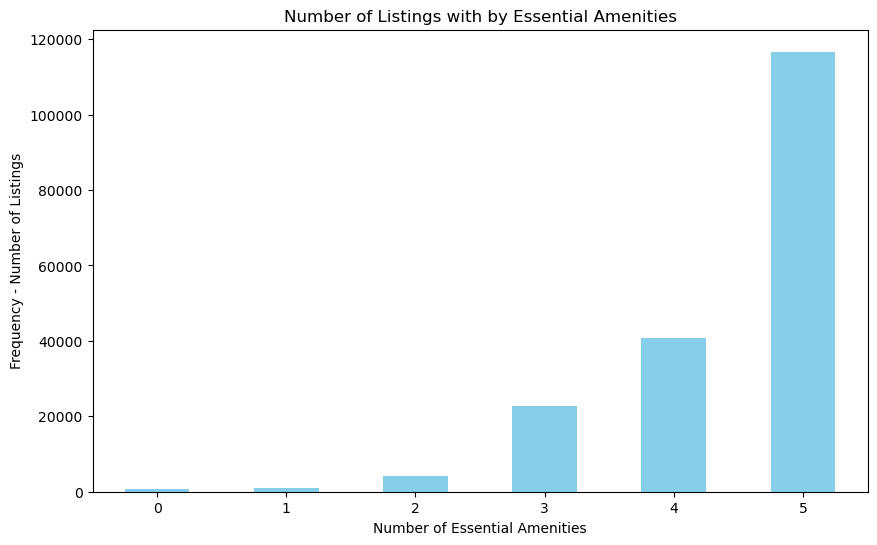

In [62]:
# Counting the number of rows for each unique value in 'essential_amenities'
amenities_count = clean_df['essential_amenities'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
amenities_count.plot(kind='bar', color='skyblue')
plt.title('Number of Listings with by Essential Amenities')
plt.xlabel('Number of Essential Amenities')
plt.ylabel('Frequency - Number of Listings')
plt.xticks(rotation=0)
plt.show()

#### EDA on Essential Amenties for Each City

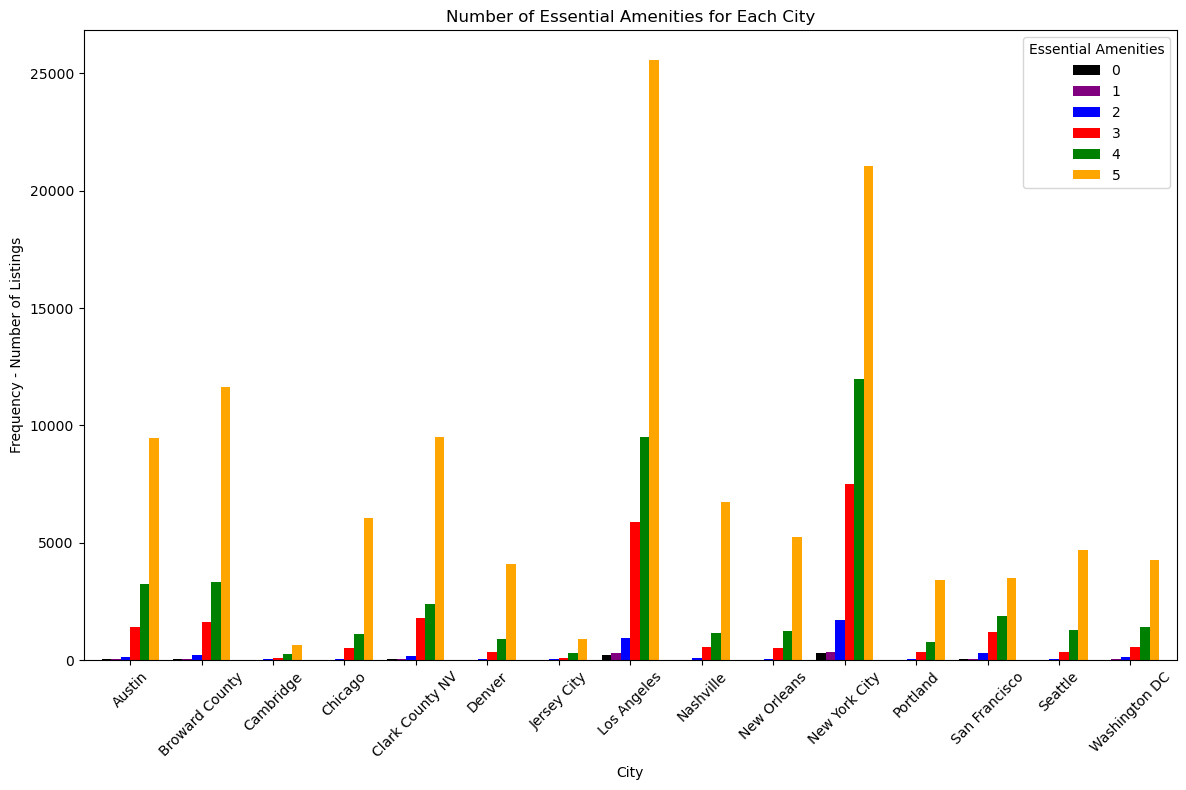

In [63]:
# Grouping the data by 'city' and 'essential_amenities' to counting the number of listings for each group

colors = ['black', 'purple', 'blue', 'red', 'green', 'orange']
grouped_count = clean_df.groupby(['city', 'essential_amenities']).size().unstack(fill_value=0)

grouped_count.plot(kind='bar', figsize=(12, 8), width=0.8, color=colors)
plt.title('Number of Essential Amenities for Each City')
plt.xlabel('City')
plt.ylabel('Frequency - Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Essential Amenities')
plt.tight_layout()
plt.show()

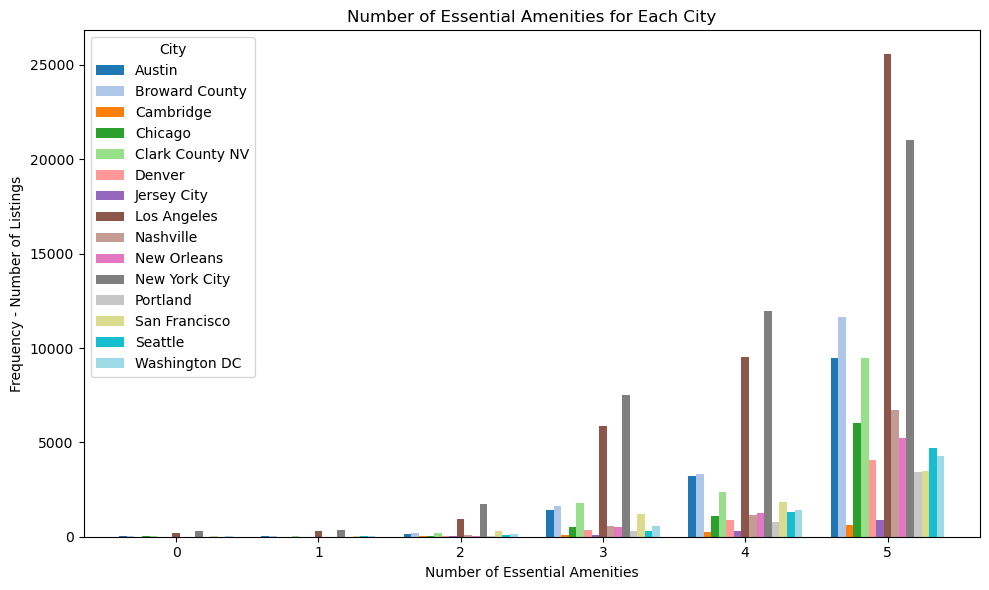

In [64]:
# Creating a plot for a side-by-side city comparison for each essential amenity count while above graphic is plot
# of each city's essential amenities count together - so it's just a different representation view
pivot_count = clean_df.pivot_table(index='essential_amenities', columns='city', aggfunc='size', fill_value=0)

pivot_count.plot(kind='bar', colormap = 'tab20', figsize=(10, 6), width=0.8)
plt.title('Number of Essential Amenities for Each City')
plt.xlabel('Number of Essential Amenities')
plt.ylabel('Frequency - Number of Listings')
plt.xticks(rotation=0)
plt.legend(title='City')
plt.tight_layout()
plt.show()

### EDA on Amenties Count for All Cities

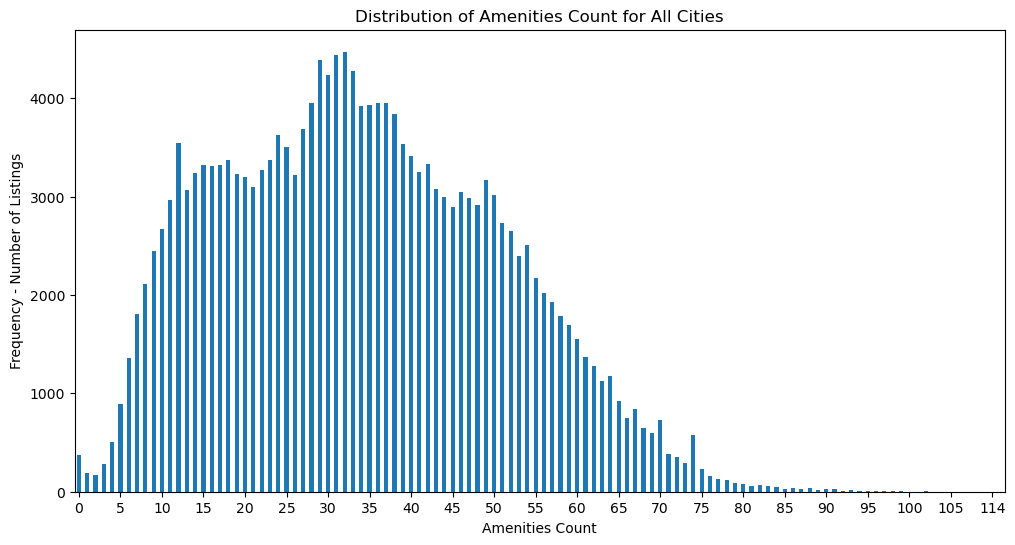

In [65]:
# Count of each amenities_count value
amenities_count_distribution = clean_df['amenities_count'].value_counts().sort_index()

plt.figure(figsize=(12, 6)) 
amenities_count_distribution.plot(kind='bar')
plt.title('Distribution of Amenities Count for All Cities')
plt.xlabel('Amenities Count')
plt.ylabel('Frequency - Number of Listings')

plt.xticks(rotation=0)  
tick_spacing = 5  
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(tick_spacing))

plt.show()

#### Boxplot on Amenties Count for Each City

We see that the median number of amenities for every city is roughly similar.

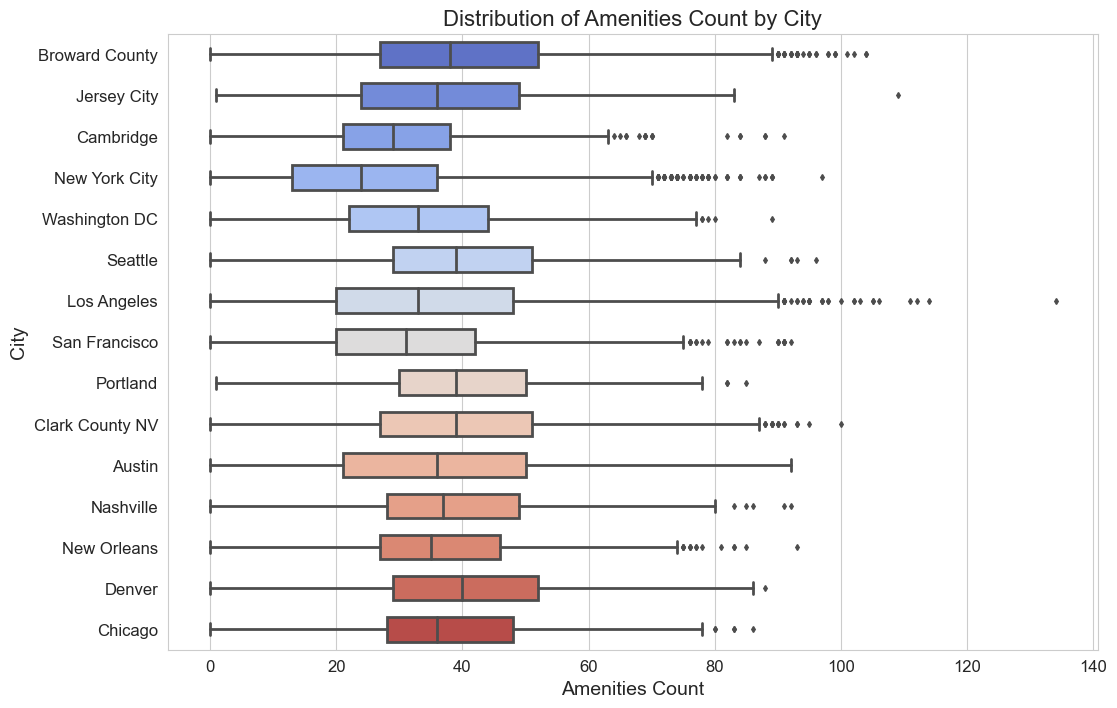

In [66]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='amenities_count', y='city', data=clean_df,
            palette="coolwarm", 
            width=0.6,  
            linewidth=2, 
            fliersize=3, 
            )

plt.title('Distribution of Amenities Count by City', fontsize=16)
plt.xlabel('Amenities Count', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


### EDA on Host Verifications

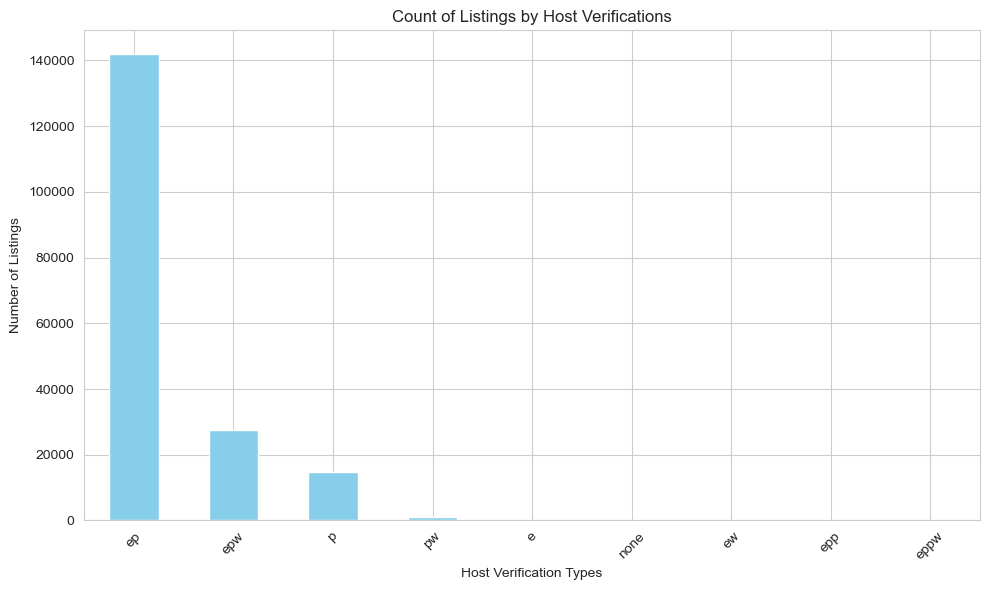

In [67]:

# Counting the number of rows for each unique value in 'host_verifications_clean'
verifications_count = clean_df['host_verifications_clean'].value_counts()

plt.figure(figsize=(10, 6))
verifications_count.plot(kind='bar', color='skyblue')
plt.title('Count of Listings by Host Verifications')
plt.xlabel('Host Verification Types')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

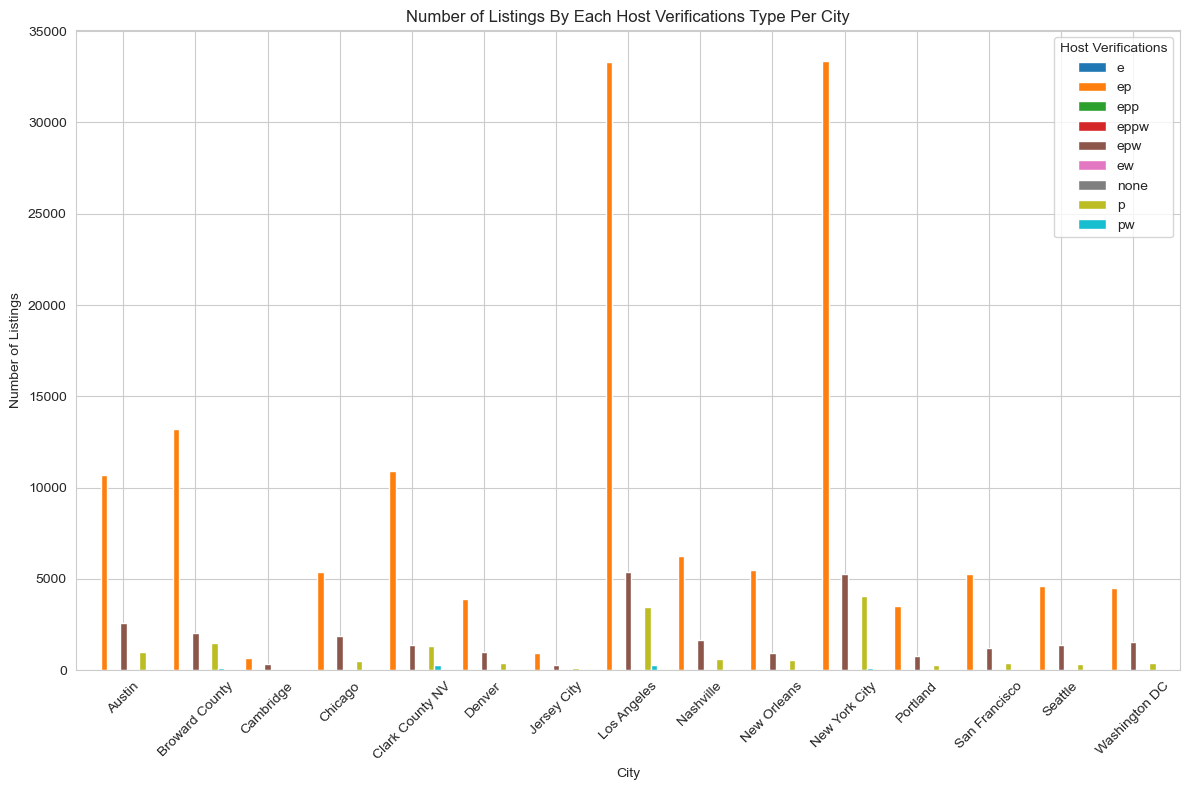

In [68]:
# For each city, look at the different host verifications type
grouped_city_verification_count = clean_df.groupby(['city', 'host_verifications_clean']).size().unstack(fill_value=0)

grouped_city_verification_count.plot(kind='bar', figsize=(12, 8), width=0.8, colormap='tab10')
plt.title('Number of Listings By Each Host Verifications Type Per City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Host Verifications')
plt.tight_layout()
plt.show()

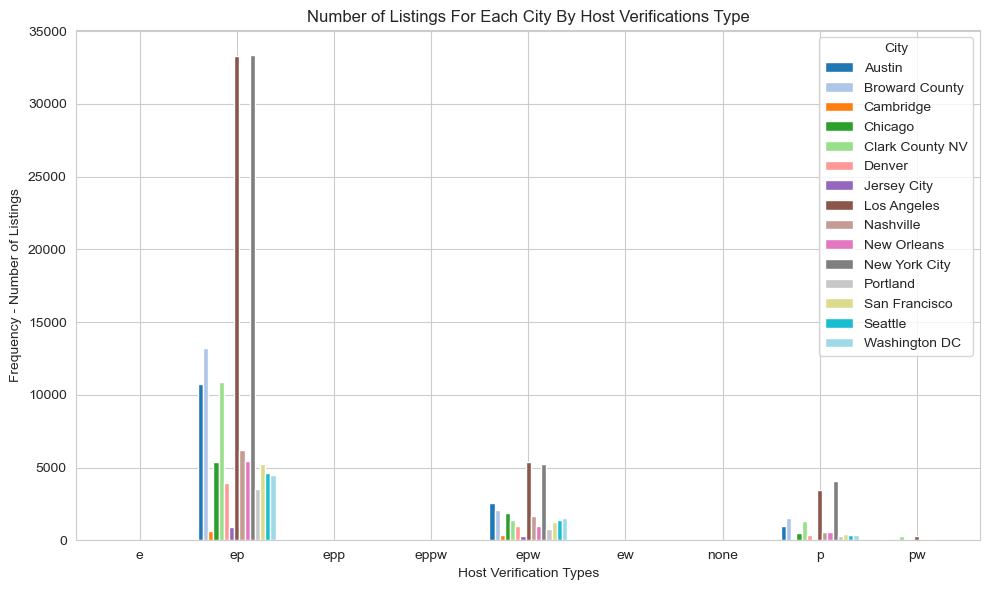

In [69]:
# For each host verifications type, look at how each city is different
pivot_count = clean_df.pivot_table(index='host_verifications_clean', columns='city', aggfunc='size', fill_value=0)

pivot_count.plot(kind='bar', colormap = 'tab20', figsize=(10, 6), width=0.8)
plt.title('Number of Listings For Each City By Host Verifications Type')
plt.xlabel('Host Verification Types')
plt.ylabel('Frequency - Number of Listings')
plt.xticks(rotation=0)
plt.legend(title='City')
plt.tight_layout()
plt.show()

### Frequency Count EDA on Specific Property Information

EDA is done for the following property information:
* accomodates
* bedrooms
* beds
* num_bath

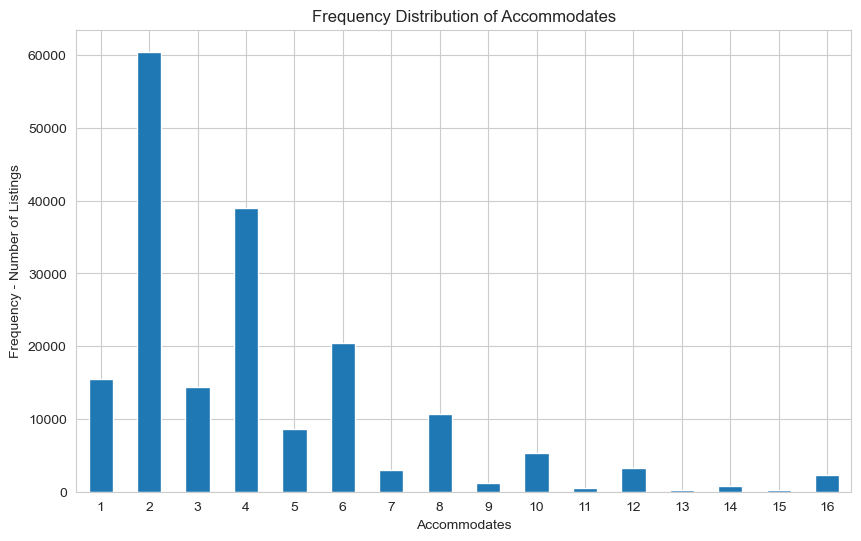

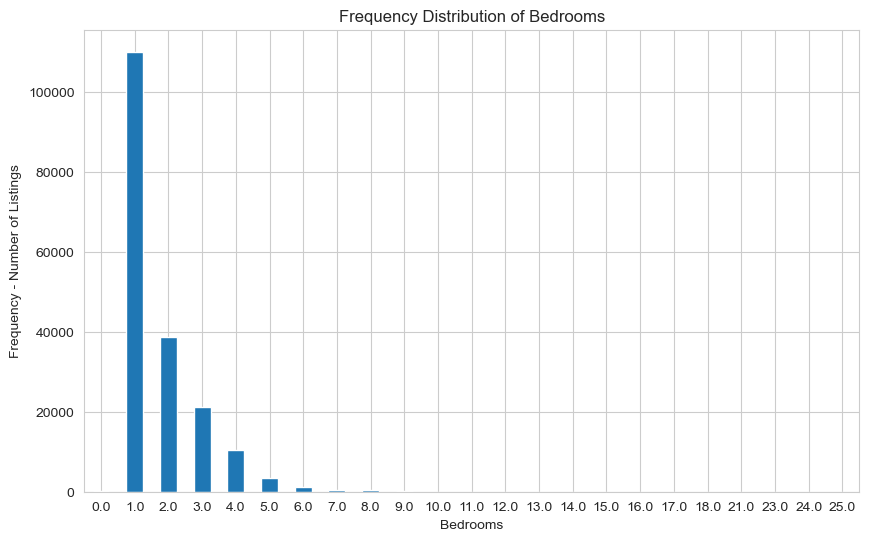

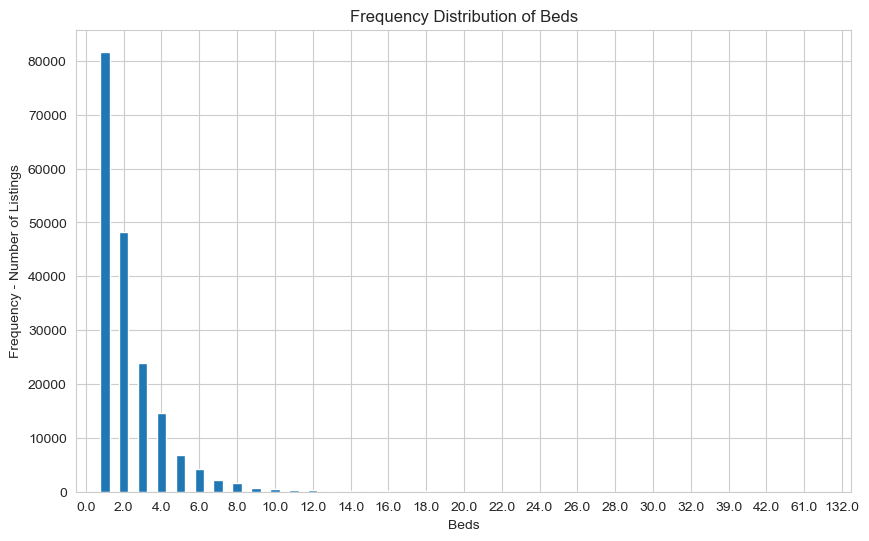

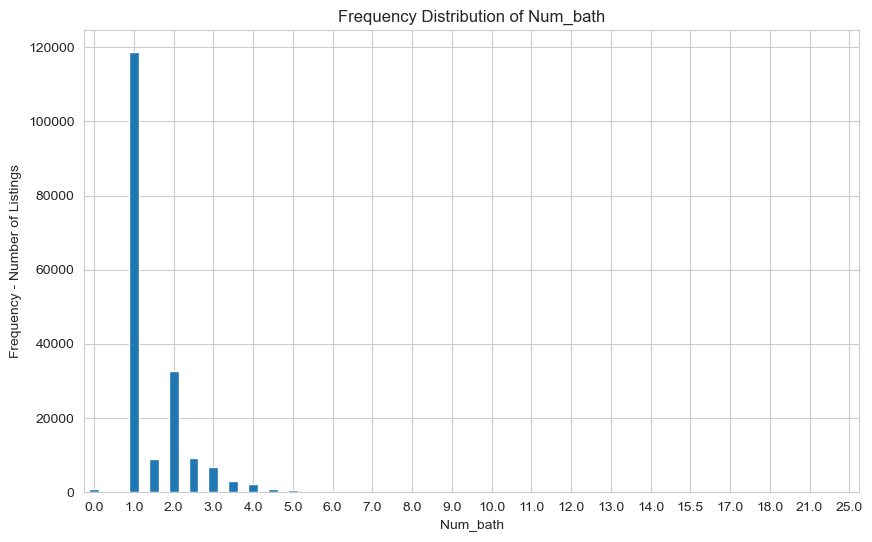

In [70]:

columns = ['accommodates', 'bedrooms']

for column in columns:
    plt.figure(figsize=(10, 6))
    value_counts_sorted_index = clean_df[column].value_counts().sort_index()
    value_counts_sorted_index.plot(kind='bar')
    plt.title(f'Frequency Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency - Number of Listings')
    plt.xticks(rotation=0)
    
    plt.show()
    

columns = ['beds', 'num_bath']
for column in columns:
    plt.figure(figsize=(10, 6))
    value_counts_sorted_index = clean_df[column].value_counts().sort_index()
    value_counts_sorted_index.plot(kind='bar')
    plt.title(f'Frequency Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency - Number of Listings')
    plt.xticks(rotation=0)
    tick_spacing = 2
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
    plt.show()

In [71]:
# Look at the specific stats for certain columns to get a better understanding of the data
selected_columns = ['accommodates', 'beds', 'num_bath', 'bedrooms']
stats_selected_cols = clean_df[selected_columns].describe()

stats_selected_cols


,accommodates,beds,num_bath,bedrooms
count,185918.000000,185918.000000,185918.000000,185918.000000
mean,4.149001,2.298008,1.503182,1.744048
std,2.932396,1.951242,0.941697,1.168672
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,4.000000,2.000000,1.000000,1.000000
75%,6.000000,3.000000,2.000000,2.000000
max,16.000000,132.000000,25.000000,25.000000


#### Boxplot on the Specific Listing Information to Visualize Descriptive Stats

Creating a boxplot to visualize the descriptive stats seen above and get a better idea of outliers. We see that each of these property features have outliers.

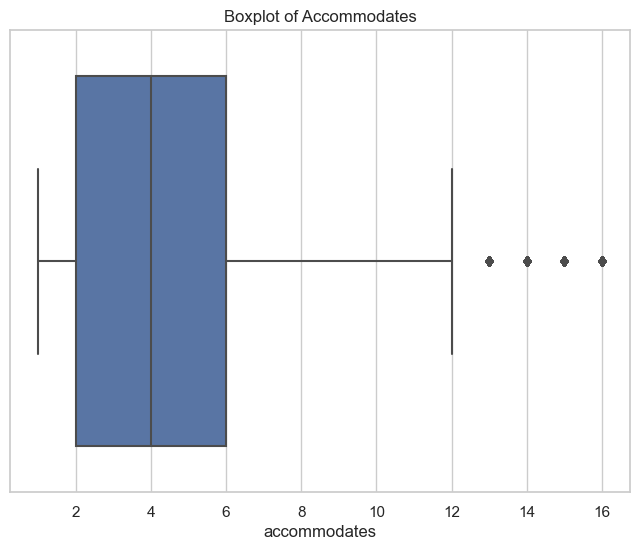

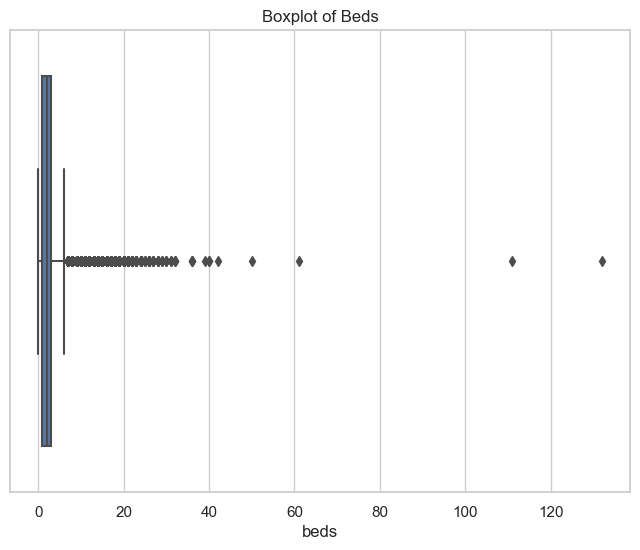

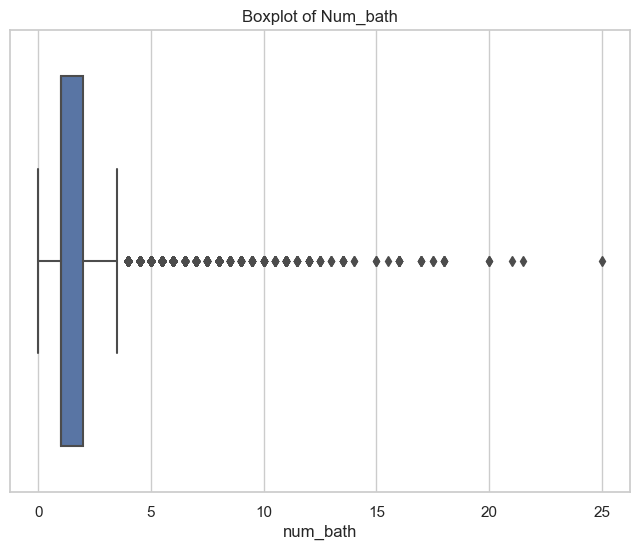

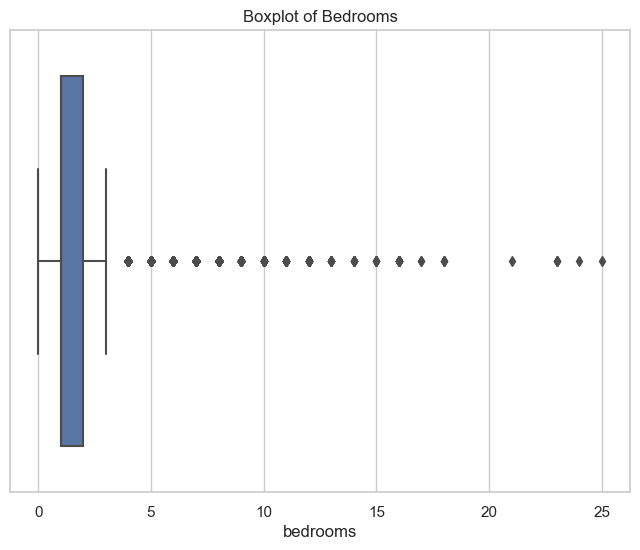

In [72]:
columns = ['accommodates', 'beds', 'num_bath', 'bedrooms']

sns.set(style="whitegrid")

for column in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=clean_df[column])
    plt.title(f'Boxplot of {column.capitalize()}')
    plt.show()

#### Identify the outliers for the specific property information

We want to identify the outliers of each of the specific property information to see how many total outliers are there for each type of property information and understand what are the distribution of outliers.

In [73]:
# Checking the specific columns for outliers
columns = ['accommodates', 'beds', 'num_bath', 'bedrooms']

# Dictionary to hold DataFrames of outliers for each column
outlier_dfs = {}

for column in columns:
    Q1 = clean_df[column].quantile(0.25)
    Q3 = clean_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter values outside of the IQR - which makes it an outlier
    mask = (clean_df[column] < lower_bound) | (clean_df[column] > upper_bound)
    outliers = clean_df[mask]
    
    # Store if outliers
    if not outliers.empty:
        outlier_dfs[column] = outliers[[column]]

for column, df in outlier_dfs.items():
    print(f"Outliers in {column}:\n{df}\n")

Outliers in accommodates:
        accommodates
12                16
39                13
120               16
148               16
182               16
...              ...
185686            13
185755            16
185792            16
185800            16
185884            16

[3606 rows x 1 columns]

Outliers in beds:
        beds
12      12.0
39       7.0
120     12.0
123      7.0
148      9.0
...      ...
185686   9.0
185792  10.0
185884  11.0
185895   8.0
185896   8.0

[6348 rows x 1 columns]

Outliers in num_bath:
        num_bath
12           4.0
49           4.0
126          4.5
239          4.0
254          4.0
...          ...
185439       5.5
185493       6.0
185674       4.0
185681       4.0
185886      11.0

[5426 rows x 1 columns]

Outliers in bedrooms:
        bedrooms
2            4.0
12           6.0
17           4.0
39           4.0
42           4.0
...          ...
185800       4.0
185806       5.0
185836       4.0
185884       4.0
185892       4.0

[15752 rows x 1 c

#### Unique outlier values from the above dataframes

We see that accommodates only has 4 unique types, but these 4 types equate to 3606 rows of data.

In [74]:
# Seeing what are the unique outlier values from the above dataframes
for column, df in outlier_dfs.items():
    unique_values = df[column].unique()
    print(f"Unique outliers in {column}: {unique_values}\n")

Unique outliers in accommodates: [16 13 14 15]

Unique outliers in beds: [ 12.   7.   9.   8.  11.  10.  17.  14.  15.  19.  13.  16.  18.  20.
  21.  42.  24.  32.  50.  27.  26.  25.  22.  36.  39.  61. 132.  23.
  31.  30.  40. 111.  29.  28.]

Unique outliers in num_bath: [ 4.   4.5  5.5  6.5  5.   6.  12.   7.   8.   9.5  9.  11.5  7.5 20.
  8.5 11.  10.  15.5 15.  16.  21.5 13.5 21.  12.5 10.5 13.  18.  14.
 17.  17.5 25. ]

Unique outliers in bedrooms: [ 4.  6.  5.  8.  7. 11.  9. 21. 10. 12. 16. 14. 15. 13. 24. 23. 18. 17.
 25.]



### Frequency EDA on Host Listings Count

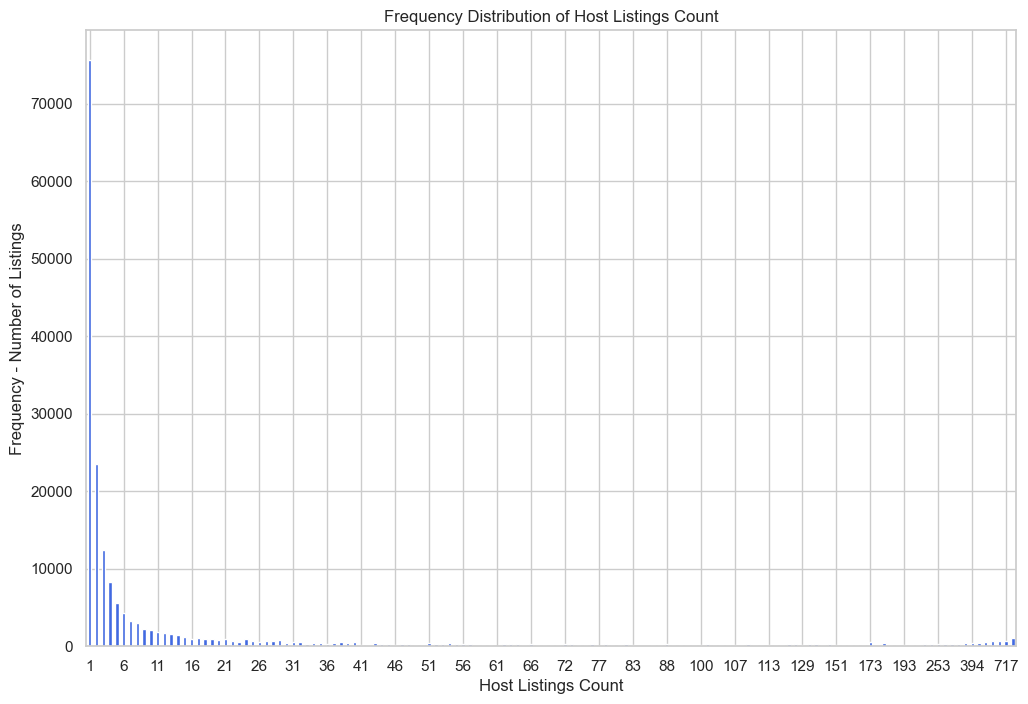

In [75]:
plt.figure(figsize=(12, 8))
value_counts_sorted_index = clean_df['calculated_host_listings_count'].value_counts().sort_index()
value_counts_sorted_index.plot(kind='bar', color='royalblue')
plt.title('Frequency Distribution of Host Listings Count')
plt.xlabel('Host Listings Count')
plt.ylabel('Frequency - Number of Listings')
plt.xticks(rotation=0)
tick_spacing = 5
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(tick_spacing))    
plt.show()

### Number of Listings Per City EDA

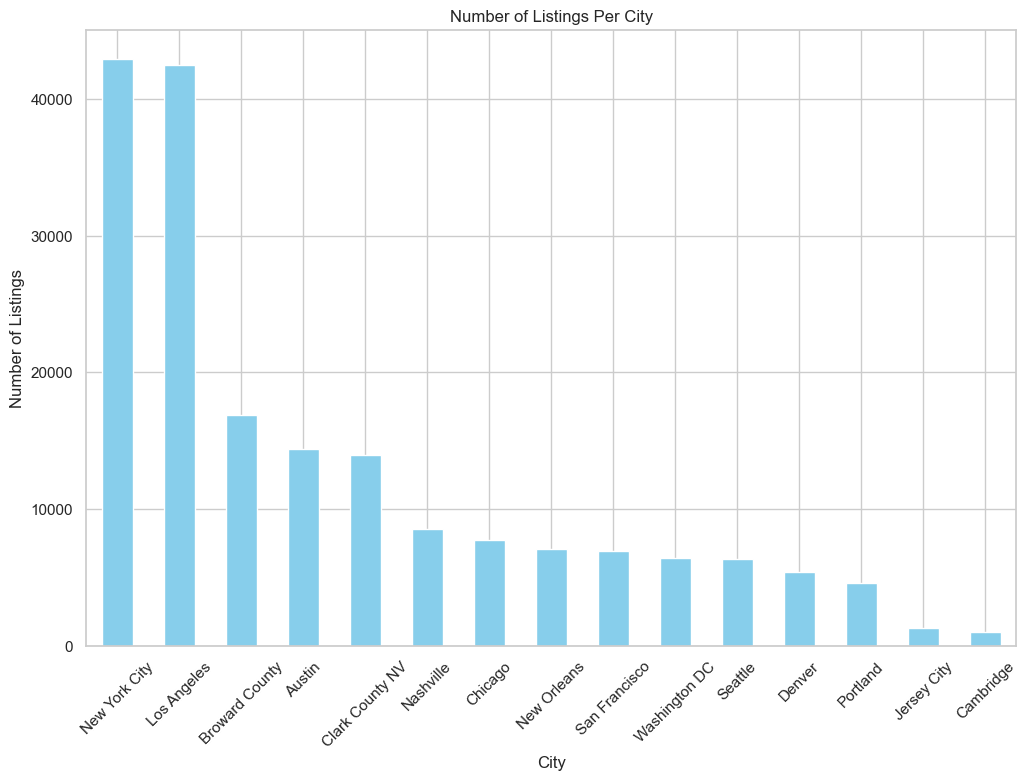

In [76]:
city_counts = clean_df['city'].value_counts()

plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Listings Per City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()